In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

from ckine.model import runIL2simple

changesAff = np.logspace(-2, 2, num=7)

def dRespon_loc(input, CD25): # same as dRespon except with different ILs range
        """ Calculate an IL2 dose response curve. """
        ILs = np.logspace(-4.0, 3.0)
        activee = np.array([runIL2simple(input, ii, CD25) for ii in ILs])
        return ILs, activee

def plot_dResp_2Ra(CD25, ax):
    """ Plots dose response curves for various IL2Ra affinities given a CD25 relative expression rate. """
    for i, itemA in enumerate(changesAff):
        ILs, BB = dRespon_loc([itemA, 1.0, 5.0], CD25)
        ax.semilogx(ILs, BB, label=str(round(itemA, 2)))

    ax.set_ylabel('Active Receptor Complexes (#/cell)');
    ax.set_xlabel('IL2 [nM]');
    
def plot_dResp_2Rb(CD25, ax):
    """ Plots dose response curves for various IL2Rb affinities given a CD25 relative expression rate. """
    for i, itemB in enumerate(changesAff):
        ILs, BB = dRespon_loc([1.0, itemB, 5.0], CD25)
        ax.semilogx(ILs, BB, label=str(round(itemB, 2)))

    ax.set_ylabel('Active Receptor Complexes (#/cell)');
    ax.set_xlabel('IL2 [nM]');

def plot_dResp_2Rb_HIGH(CD25, ax):
    """ Plots dose response curves for various IL2Rb affinities given a CD25 relative expression rate. """
    for i, itemB in enumerate(changesAff):
        ILs, BB = dRespon_loc([0.1, itemB, 5.0], CD25)
        ax.semilogx(ILs, BB, label=str(round(itemB, 2)))

    ax.set_ylabel('Active Receptor Complexes (#/cell)');
    ax.set_xlabel('IL2 [nM]');

### Dose response when changing IL2Ra affinity alone

This plot shows how a CD25+ cell's dose-response behavior shifts when you increase the affinity of IL2 for IL2Ra. Lines with smaller Kd's correspond to higher binding affinity.

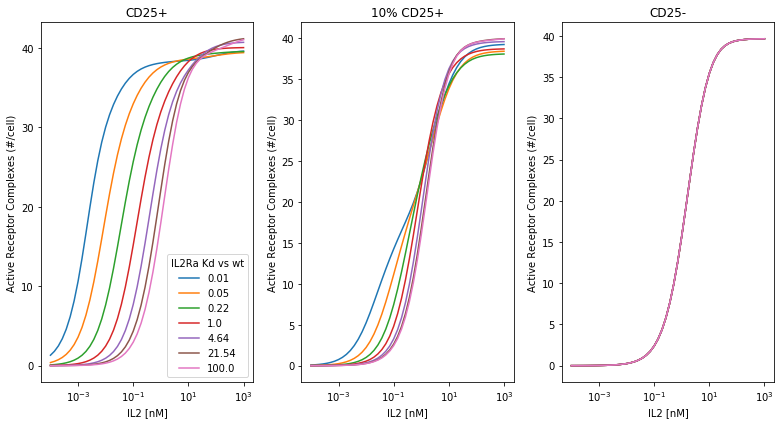

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(11, 6))
plot_dResp_2Ra(1.0, axs[0]);
axs[0].set_title("CD25+")
plot_dResp_2Ra(0.1, axs[1]);
axs[1].set_title("10% CD25+")
plot_dResp_2Ra(0.0, axs[2]);
axs[2].set_title("CD25-");
axs[0].legend(title="IL2Ra Kd vs wt");
fig.tight_layout()

### Dose response when changing IL2Rb affinity alone (for wt IL2Ra affinity)

This plot shows how a CD25+ cell's dose-response behavior shifts when you decrease the affinity of IL2 for IL2Rb. Lines with larger Kd's correspond to lower binding affinity.

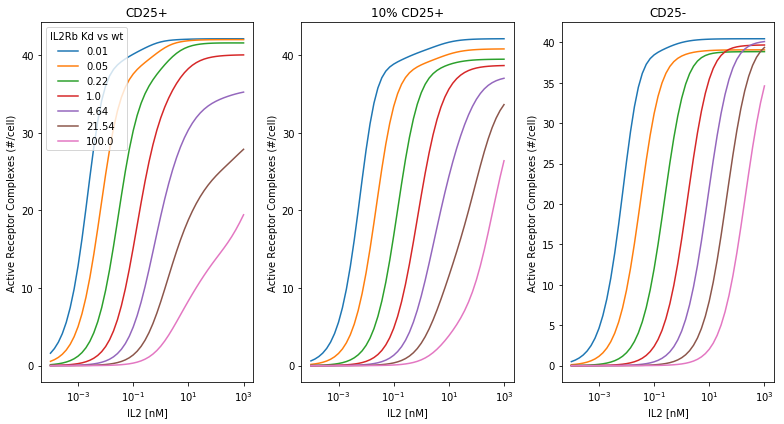

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(11, 6))
plot_dResp_2Rb(1.0, axs[0]);
axs[0].set_title("CD25+")
axs[0].legend(title="IL2Rb Kd vs wt");
plot_dResp_2Rb(0.1, axs[1]);
axs[1].set_title("10% CD25+")
plot_dResp_2Rb(0.0, axs[2]);
axs[2].set_title("CD25-");
fig.tight_layout()

### Dose response when changing IL2Rb affinity alone (for 10X higher IL2Ra affinity)

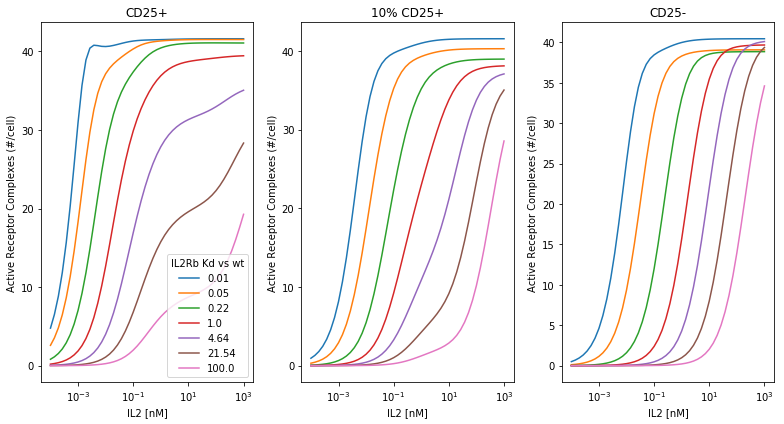

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(11, 6))
plot_dResp_2Rb_HIGH(1.0, axs[0]);
axs[0].set_title("CD25+")
axs[0].legend(title="IL2Rb Kd vs wt");
plot_dResp_2Rb_HIGH(0.1, axs[1]);
axs[1].set_title("10% CD25+")
plot_dResp_2Rb_HIGH(0.0, axs[2]);
axs[2].set_title("CD25-");
fig.tight_layout()